<a href="https://colab.research.google.com/github/Abhishekmalakar/ML-Model-Wine-Quality/blob/main/Wine_Quality_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
wine_Ds=pd.read_csv("wine_dataset.csv")

In [ ]:
# number of rows and column in data set
wine_Ds.shape

(6497, 13)

In [ ]:
print(wine_Ds)

      fixed_acidity  volatile_acidity  citric_acid  ...  alcohol  quality  style
0               7.4              0.70         0.00  ...      9.4        5    red
1               7.8              0.88         0.00  ...      9.8        5    red
2               7.8              0.76         0.04  ...      9.8        5    red
3              11.2              0.28         0.56  ...      9.8        6    red
4               7.4              0.70         0.00  ...      9.4        5    red
...             ...               ...          ...  ...      ...      ...    ...
6492            6.2              0.21         0.29  ...     11.2        6  white
6493            6.6              0.32         0.36  ...      9.6        5  white
6494            6.5              0.24         0.19  ...      9.4        6  white
6495            5.5              0.29         0.30  ...     12.8        7  white
6496            6.0              0.21         0.38  ...     11.8        6  white

[6497 rows x 13 columns]


In [ ]:
wine_Ds.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [ ]:
# cheking missing values
wine_Ds.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
style                   0
dtype: int64

In [ ]:
# statical analisys 
wine_Ds.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


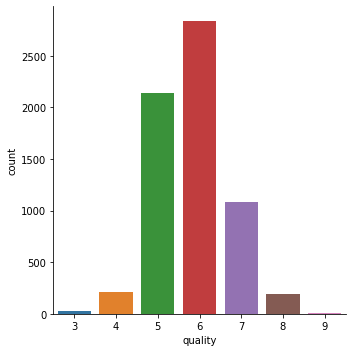

In [ ]:
# number of values of each quality
sns.catplot(x='quality',data=wine_Ds,kind='count')

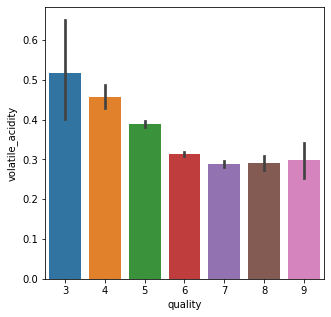

In [ ]:
#valatile acidity vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='volatile_acidity',data=wine_Ds)

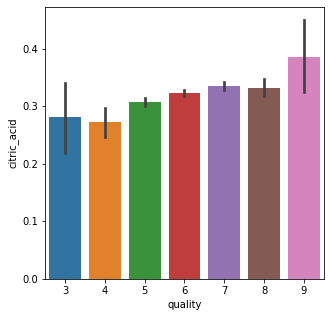

In [ ]:
#citric acid vs quality
plot=plt.figure(figsize=(5,5))
sns.barplot(x='quality',y='citric_acid',data=wine_Ds)

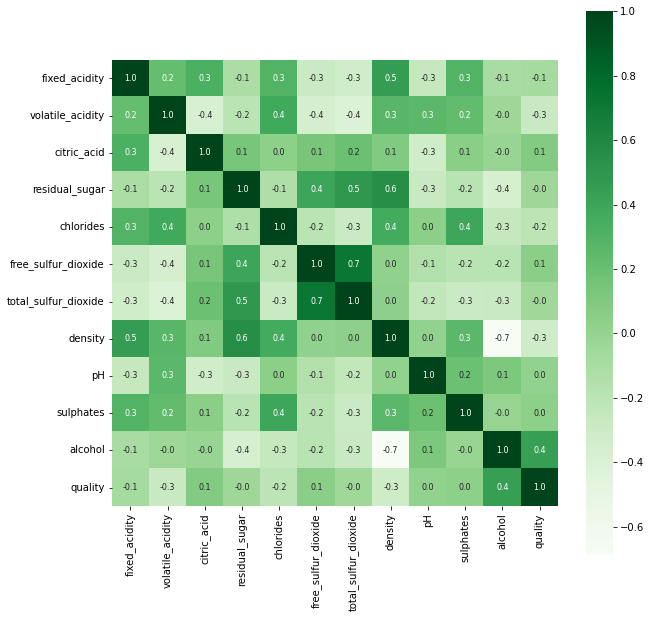

In [ ]:
#correlation
#positive and negative
#custruct map correation between columns
correlation=wine_Ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Greens')

In [ ]:
# Data pre proccesing

# saperate data lebel
x= wine_Ds.drop('quality',axis=1)
y=wine_Ds.quality

In [ ]:
print(x)

      fixed_acidity  volatile_acidity  citric_acid  ...  sulphates  alcohol  style
0               7.4              0.70         0.00  ...       0.56      9.4    red
1               7.8              0.88         0.00  ...       0.68      9.8    red
2               7.8              0.76         0.04  ...       0.65      9.8    red
3              11.2              0.28         0.56  ...       0.58      9.8    red
4               7.4              0.70         0.00  ...       0.56      9.4    red
...             ...               ...          ...  ...        ...      ...    ...
6492            6.2              0.21         0.29  ...       0.50     11.2  white
6493            6.6              0.32         0.36  ...       0.46      9.6  white
6494            6.5              0.24         0.19  ...       0.46      9.4  white
6495            5.5              0.29         0.30  ...       0.38     12.8  white
6496            6.0              0.21         0.38  ...       0.32     11.8  white

[64

In [ ]:
print(y)

0       5
1       5
2       5
3       6
4       5
       ..
6492    6
6493    5
6494    6
6495    7
6496    6
Name: quality, Length: 6497, dtype: int64


In [ ]:
# Lebel Binarization 
y=wine_Ds['quality'].apply(lambda y_value: 1 if y_value>=6  else 0)

In [ ]:
print(y)

0       0
1       0
2       0
3       1
4       0
       ..
6492    1
6493    0
6494    1
6495    1
6496    1
Name: quality, Length: 6497, dtype: int64


In [ ]:
# train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(y.shape,y_train.shape,y_test.shape)

(6497,) (5197,) (1300,)


In [ ]:
wine_Ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine_Ds.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [ ]:
 from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()
wine_Ds['style']=le.fit_transform(wine_Ds['style'])
wine_Ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
wine_Ds['style'] = pd.DataFrame(wine_Ds['style'])
   
# providing dtype
print(wine_Ds['style'].to_numpy(dtype ='float64'))

[0. 0. 0. ... 1. 1. 1.]


In [ ]:
wine_Ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  style                 6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [ ]:
# train and test data

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
model=RandomForestClassifier()

In [ ]:
model.fit(x_train,y_train)

RandomForestClassifier()



*   List item
*   List item



Model Evaluation


In [ ]:
#Acuracy Score
x_test_prediction = model.predict(x_test)
test_data_accuracy =accuracy_score(x_test_prediction, y_test)

In [ ]:
print('Accuracy:',test_data_accuracy)

Accuracy: 0.6946153846153846


Building a predictive System

In [ ]:
input_data=(7.3,0.65,0,1.2,0.065,15,21,0.9946,3.39,0.47,10,7)

#change the input to numpy array
input_data_as_numpy_array =np.asarray(input_data)

# RESHAPE the data as we predict the lebel for only for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction =model.predict(input_data_reshaped)
print(prediction)

if(prediction[0]--1):
  print('Good Quality Wine ')
else:
  print('Bad Quality Wine') 

[7]
Good Quality Wine 


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
